# Can we predict the date given the price, volume, opening price, lowest bid,
ask price and closing bid of stock data from AT&T?
## Learning From Data Imports

In [21]:
%matplotlib inline
import numpy as np # For array operations
import matplotlib.pyplot as plt # For plotting
import pandas as pd # Read CSV file
import seaborn as sns # For pairplot
from sklearn.model_selection import train_test_split, cross_val_score, KFold # Use uniskit to define how big our data should be
from sklearn.linear_model import LinearRegression, Ridge # Import linear regression
from sklearn.preprocessing import LabelEncoder # Turn categorical data to integers
from sklearn import metrics #import metrics
from sklearn.preprocessing import StandardScaler, Normalizer #import standardization and normalization
import xgboost as xgb #XGB regression
import shap #Shap values
from sklearn.decomposition import PCA #PCA
import datetime #Datetime
import math #Math operations



## Reading the data, pre-processing and data visualization

BID has 24 NA values
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5263 entries, 0 to 5286
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   a_permno  5263 non-null   int64  
 1   PERMNO    5263 non-null   int64  
 2   DATE      5263 non-null   int64  
 3   CUSIP     5263 non-null   object 
 4   NCUSIP    5263 non-null   object 
 5   COMNAM    5263 non-null   object 
 6   TICKER    5263 non-null   object 
 7   PERMCO    5263 non-null   int64  
 8   SHRCD     5263 non-null   int64  
 9   SHRCLS    0 non-null      float64
 10  ISSUNO    5263 non-null   int64  
 11  EXCHCD    5263 non-null   int64  
 12  HEXCD     5263 non-null   int64  
 13  SICCD     5263 non-null   int64  
 14  HSICCD    5263 non-null   int64  
 15  HSICMG    4787 non-null   float64
 16  HSICIG    4787 non-null   float64
 17  NAMEENDT  7 non-null      float64
 18  TSYMBOL   4787 non-null   object 
 19  NAICS     4170 non-null   float64
 20  PRIMEXCH 

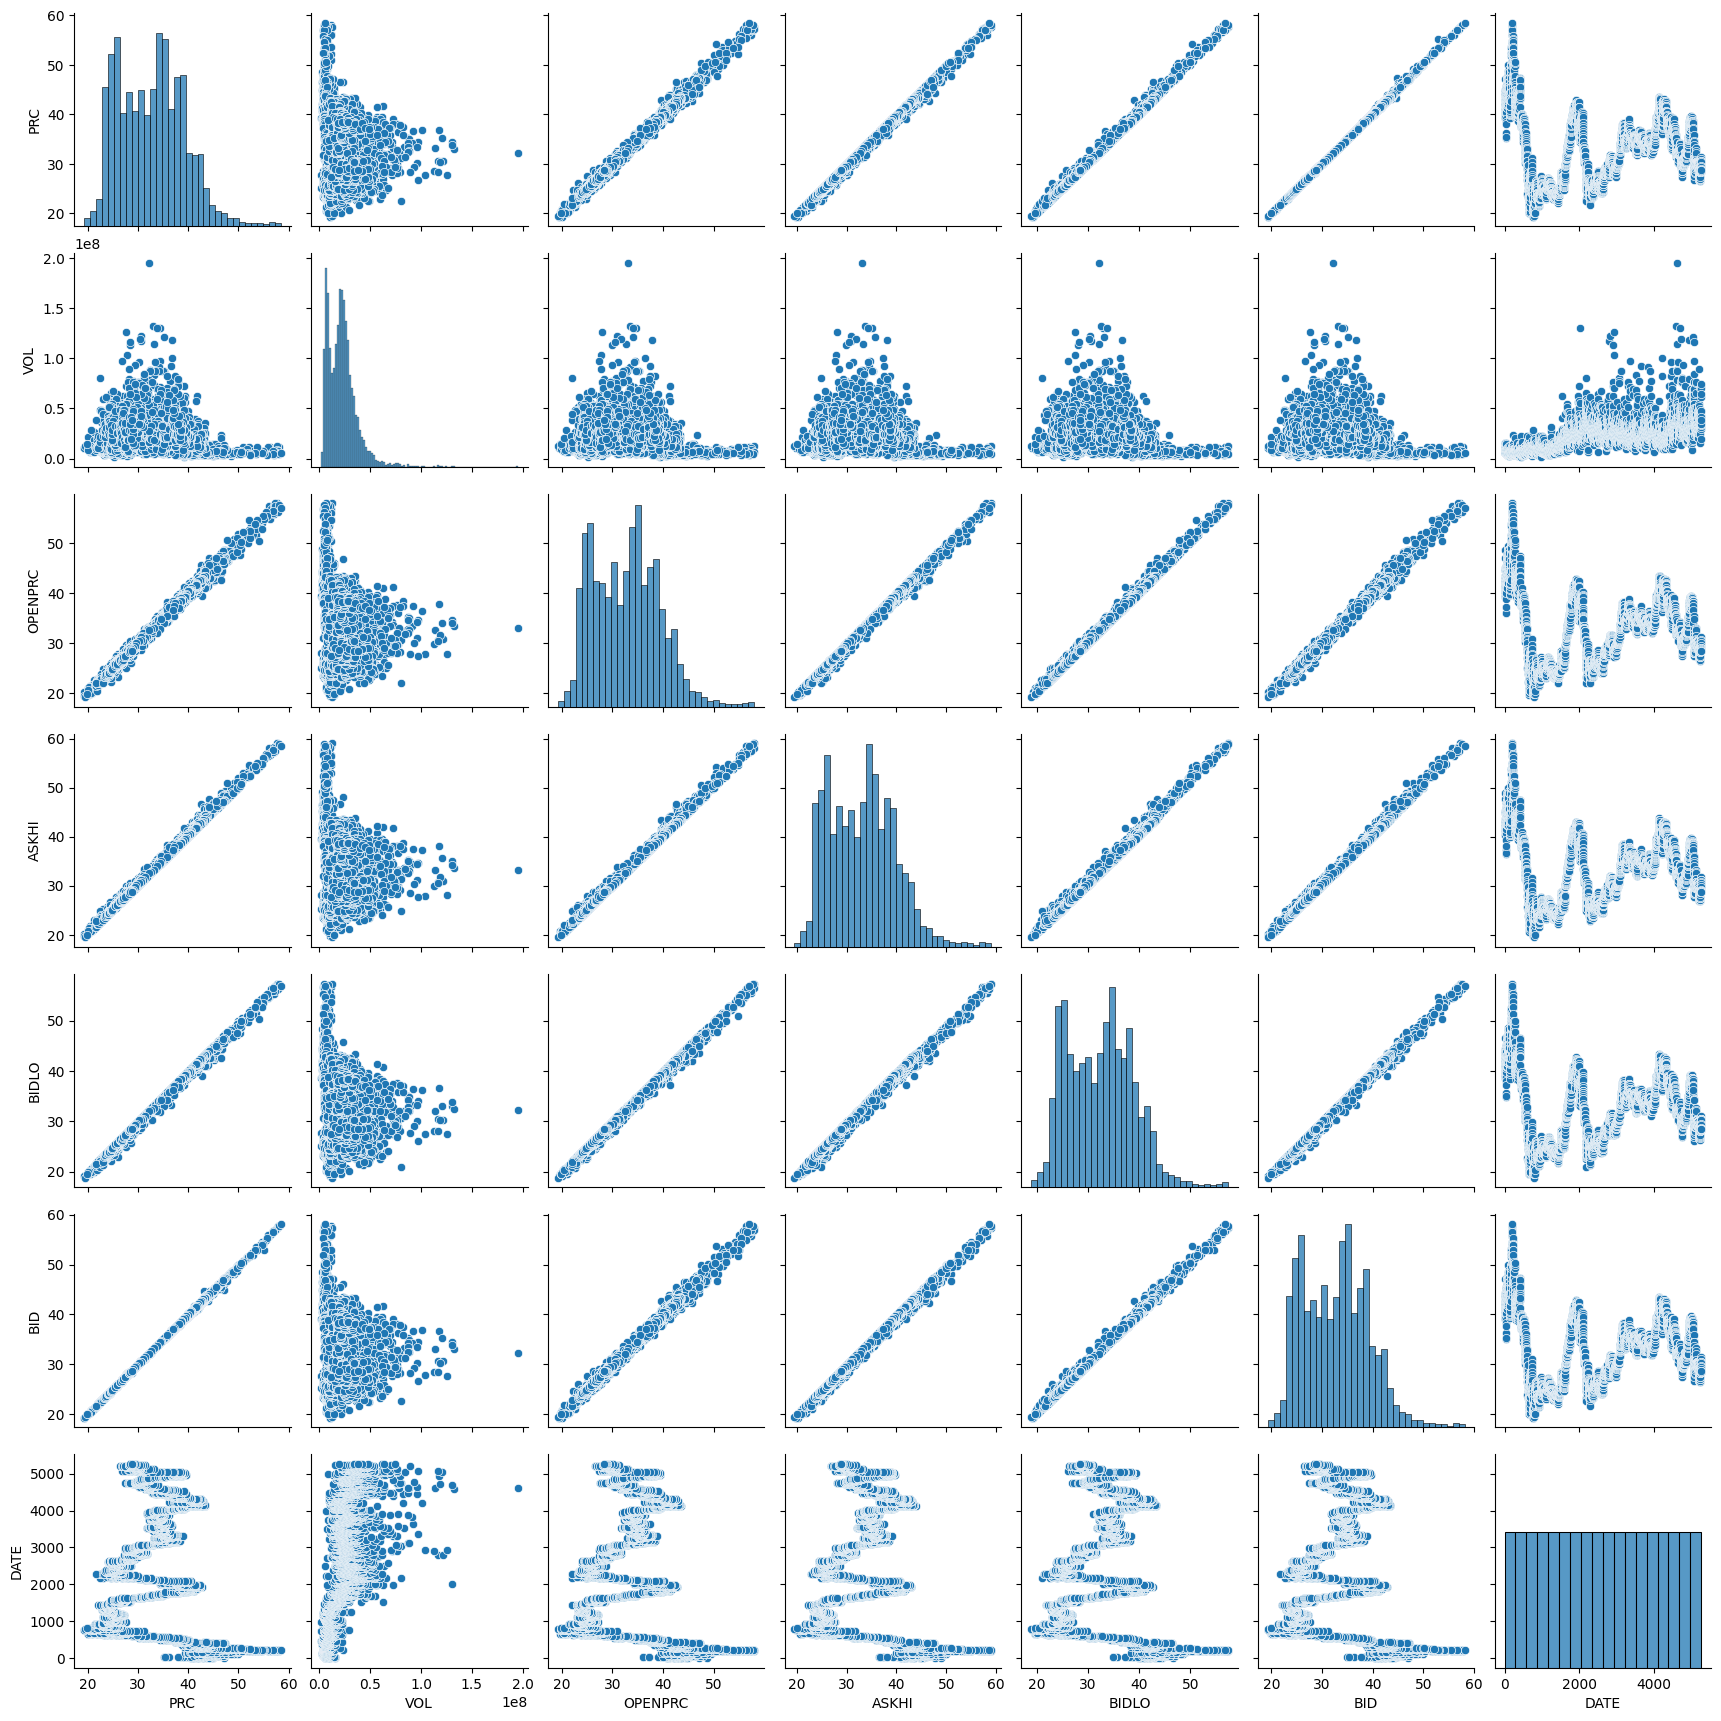

In [2]:
# Loading the AT&T dataset
att_df = pd.read_csv("att.csv")

# Removing the instnaces where BID is NA
print('BID has ' + str(att_df['BID'].isna().sum()) + " NA values")
att_df = att_df.dropna(subset=['BID'])

# Converting the DATE to integers
dates = att_df['DATE']
counter = 0
new = []
for date in dates:
    new.append(counter)
    counter = counter + 1
att_df['DATE']=new

#Information of the dataset
print(att_df.info())
sns.pairplot(att_df, vars=['PRC', 'VOL', 'OPENPRC', 'ASKHI', 'BIDLO', 'BID', 'DATE']) #Plots all of the variables against all of the other variables
plt.show()

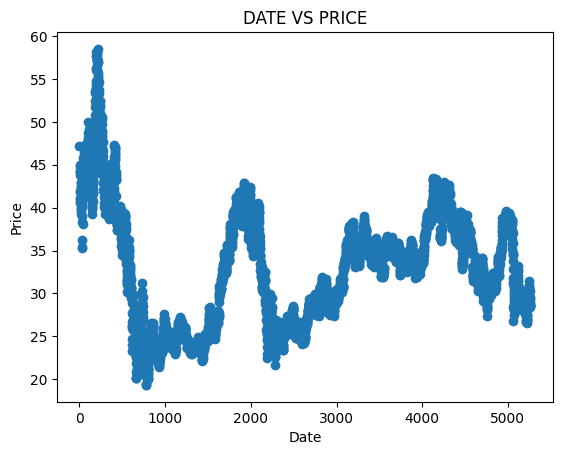

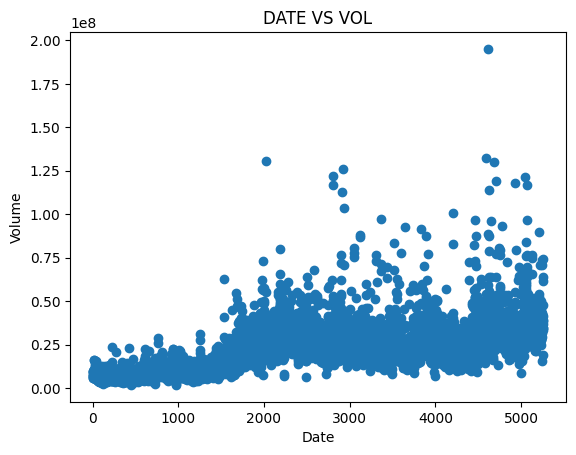

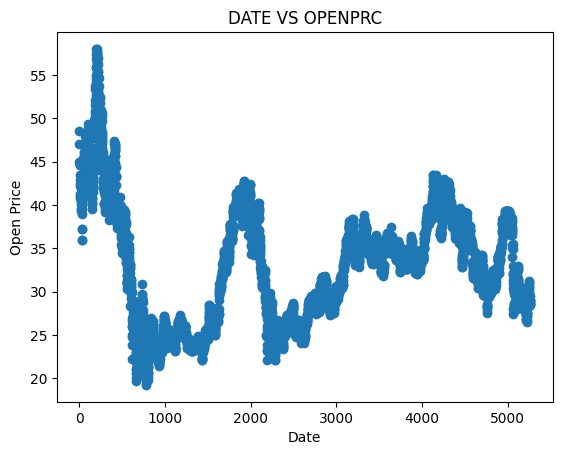

In [3]:
# DATE VS PRICE
plt.scatter(att_df['DATE'], att_df['PRC'])
plt.title("DATE VS PRICE")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


# DATE VS VOL
plt.scatter(att_df['DATE'], att_df['VOL'])
plt.title("DATE VS VOL")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


# DATE VS OPENPRC
plt.scatter(att_df['DATE'], att_df['OPENPRC'])
plt.title("DATE VS OPENPRC")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()


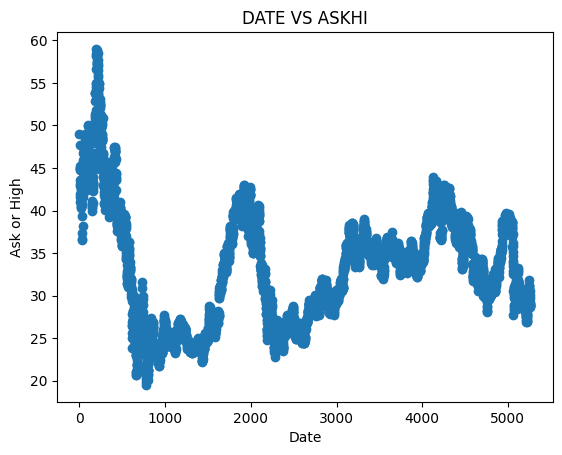

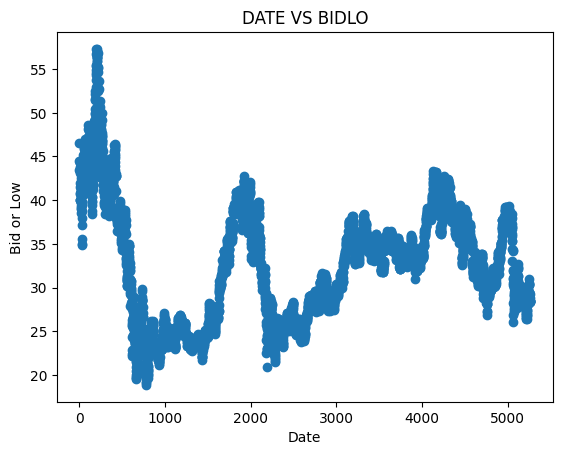

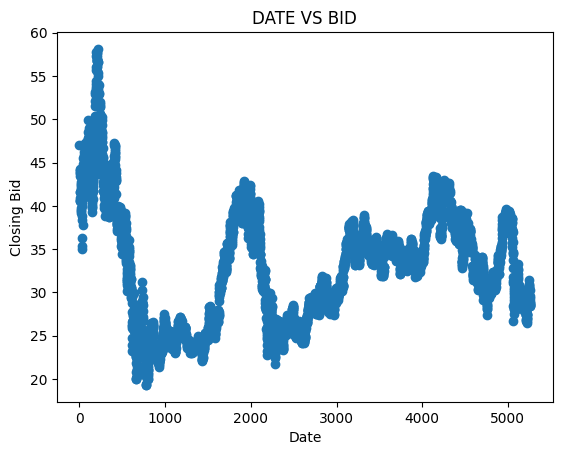

In [4]:
# DATE VS ASKHI
plt.scatter(att_df['DATE'], att_df['ASKHI'])
plt.title("DATE VS ASKHI")
plt.xlabel("Date")
plt.ylabel("Ask or High")
plt.show()


# DATE VS BIDLO
plt.scatter(att_df['DATE'], att_df['BIDLO'])
plt.title("DATE VS BIDLO")
plt.xlabel("Date")
plt.ylabel("Bid or Low")
plt.show()


# DATE VS BID
plt.scatter(att_df['DATE'], att_df['BID'])
plt.title("DATE VS BID")
plt.xlabel("Date")
plt.ylabel("Closing Bid")
plt.show()

## Defining the parameters for regression

In [5]:
x = att_df[['PRC', 'VOL', 'OPENPRC', 'ASKHI', 'BIDLO', 'BID']] # Defining variables used to make predictions
y = att_df['DATE'] # Defining the variable we are going to predict
both = att_df[['PRC', 'VOL', 'OPENPRC', 'ASKHI', 'BIDLO', 'BID', 'DATE']]

## Hyperparameter tuning

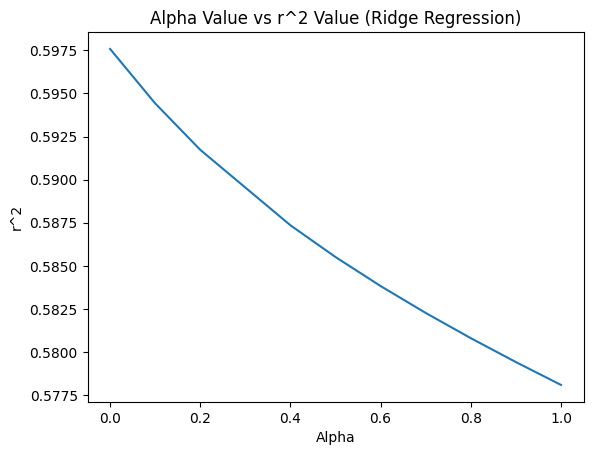

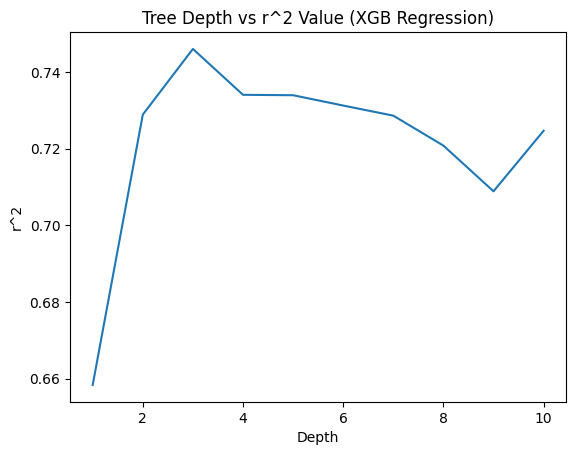

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_strain = StandardScaler().fit_transform(x_train)
x_stest = StandardScaler().fit_transform(x_test)

alpha1 = 0
alpha_store = []
results = []
for i in range (10):    
    RidReg = Ridge(alpha=alpha1) #Fitting ridge regression to our training set
    RidReg.fit(x_strain, y_train)
    alpha_store.append(alpha1)
    results.append(metrics.r2_score(y_test, RidReg.predict(x_stest)))
    alpha1 = alpha1 + 0.1
    alpha1 = math.ceil(alpha1*10) / 10
    
plt.plot(alpha_store, results)
plt.title('Alpha Value vs r^2 Value (Ridge Regression)')
plt.xlabel('Alpha')
plt.ylabel('r^2')
plt.show()


max_depth1 = 1
depth_store = []
results = []
for i in range(10):
    XGBReg = XGBReg = xgb.XGBRegressor(verbosity=0, max_depth = max_depth1) #Fitting XGB regression to our training set
    XGBReg.fit(x_strain, y_train) #Fitting ridge regression to our training set
    depth_store.append(max_depth1)
    results.append(metrics.r2_score(y_test, XGBReg.predict(x_stest)))
    max_depth1 = max_depth1 + 1

plt.plot(depth_store, results)
plt.title('Tree Depth vs r^2 Value (XGB Regression)')
plt.xlabel('Depth')
plt.ylabel('r^2')
plt.show()

    

## Fitting the regression Models

In [7]:
#K-fold parameters
repeats = 10
meanunLin = 0
meanunRid = 0
meanunXGB = 0
meansLin = 0
meansRid = 0
meansXGB = 0
meannLin = 0
meannRid = 0
meannXGB = 0
meanaunLin = 0
meanaunRid = 0
meanaunXGB = 0
meanasLin = 0
meanasRid = 0
meanasXGB = 0
meananLin = 0
meananRid = 0
meananXGB = 0

for i in range(repeats):
    #Splitting the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
    x_strain = StandardScaler().fit_transform(x_train)
    x_stest = StandardScaler().fit_transform(x_test)
    x_ntrain = Normalizer().fit_transform(x_train)
    x_ntest = Normalizer().fit_transform(x_test)
    rows = len(y_test)
    x_stest = pd.DataFrame(x_stest, index=x_test.index, columns=x_test.columns) # Changing x_stest back to df for shap values
    x_ntest = pd.DataFrame(x_ntest, index=x_test.index, columns=x_test.columns)# Changing x_ntest back to df for shap values

    # Regression on untransformed data
    LinReg = LinearRegression() #Fitting linear regression to our training set
    LinReg.fit(x_train, y_train)

    RidReg = Ridge() #Fitting ridge regression to our training set
    RidReg.fit(x_train, y_train)

    XGBReg = xgb.XGBRegressor(verbosity=0, max_depth=3) #Fitting XGB regression to our training set
    XGBReg.fit(x_train, y_train)


    # Regression on standardized data
    sLinReg = LinearRegression() #Fitting linear regression to our training set
    sLinReg.fit(x_strain, y_train)

    sRidReg = Ridge() #Fitting ridge regression to our training set
    sRidReg.fit(x_strain, y_train)

    sXGBReg = xgb.XGBRegressor(verbosity=0, max_depth=3) #Fitting XGB regression to our training set
    sXGBReg.fit(x_strain, y_train)


    # Regression on normalized data
    nLinReg = LinearRegression() #Fitting linear regression to our training set
    nLinReg.fit(x_ntrain, y_train)

    nRidReg = Ridge() #Fitting ridge regression to our training set
    nRidReg.fit(x_ntrain, y_train)

    nXGBReg = xgb.XGBRegressor(verbosity=0, max_depth=3) #Fitting XGB regression to our training set
    nXGBReg.fit(x_ntrain, y_train)


    #Making the predictions
    # Predicting untransformed data with regression models
    LinPredictions = LinReg.predict(x_test) # Predictions will equal the predicted y values for the x_test values
    RidPredictions = RidReg.predict(x_test)
    XGBPredictions = XGBReg.predict(x_test)

    # Predicting standardized data with regression models
    sLinPredictions = sLinReg.predict(x_stest) # Predictions will equal the predicted y values for the x_test values
    sRidPredictions = sRidReg.predict(x_stest)
    sXGBPredictions = sXGBReg.predict(x_stest)

    # Predicting normalized data with regression models
    nLinPredictions = nLinReg.predict(x_ntest) # Predictions will equal the predicted y values for the x_test values
    nRidPredictions = nRidReg.predict(x_ntest)
    nXGBPredictions = nXGBReg.predict(x_ntest)

    #Calculating R^2
    unLin = metrics.r2_score(y_test, LinPredictions)
    unRid = metrics.r2_score(y_test, RidPredictions)
    unXGB = metrics.r2_score(y_test, XGBPredictions)
    sLin = metrics.r2_score(y_test, sLinPredictions)
    sRid = metrics.r2_score(y_test, sRidPredictions)
    sXGB = metrics.r2_score(y_test, sXGBPredictions)
    nLin = metrics.r2_score(y_test, nLinPredictions)
    nRid = metrics.r2_score(y_test, nRidPredictions)
    nXGB = metrics.r2_score(y_test, nXGBPredictions)
    
    # Adding r^2 to mean
    meanunLin = meanunLin + unLin
    meanunRid = meanunRid + unRid
    meanunXGB = meanunXGB + unXGB
    meansLin = meansLin + sLin
    meansRid = meansRid + sRid
    meansXGB = meansXGB + sXGB
    meannLin = meannLin + nLin
    meannRid = meannRid + nRid
    meannXGB = meannXGB + nXGB

    # Calculating Adjusted r^2
    meanaunLin = meanaunLin + (1 - ((1-unLin)*(rows-1)/(rows-6-1)))
    meanaunRid = meanaunRid + (1 - ((1-unRid)*(rows-1)/(rows-6-1)))
    meanaunXGB = meanaunXGB + (1 - ((1-unXGB)*(rows-1)/(rows-6-1)))
    meanasLin = meanasLin + (1 - ((1-sLin)*(rows-1)/(rows-6-1)))
    meanasRid = meanasRid + (1 - ((1-sRid)*(rows-1)/(rows-6-1)))
    meanasXGB = meanasXGB + (1 - ((1-sXGB)*(rows-1)/(rows-6-1)))
    meananLin = meananLin + (1 - ((1-nLin)*(rows-1)/(rows-6-1)))
    meananRid = meananRid + (1 - ((1-nRid)*(rows-1)/(rows-6-1)))
    meananXGB = meananXGB + (1 - ((1-nXGB)*(rows-1)/(rows-6-1)))

# Calculating means of r^2
meanunLin = meanunLin / repeats
meanunRid = meanunRid / repeats
meanunXGB = meanunXGB / repeats
meansLin = meansLin / repeats
meansRid = meansRid / repeats
meansXGB = meansXGB / repeats
meannLin = meannLin / repeats
meannRid = meannRid / repeats
meannXGB = meannXGB / repeats
meanaunLin = meanaunLin / repeats
meanaunRid = meanaunRid / repeats
meanaunXGB = meanaunXGB / repeats
meanasLin = meanasLin / repeats
meanasRid = meanasRid / repeats
meanasXGB = meanasXGB / repeats
meananLin = meananLin / repeats
meananRid = meananRid / repeats
meananXGB = meananXGB / repeats


## Coefficients for Final k-Fold

In [8]:
print("Untransformed data:")
print("Linear Regression Coefficents:")
print(pd.DataFrame(LinReg.coef_, x.columns, columns = ['Coeff'])) #Regression coefficents
print("\n")
print("Ridge Regression Coefficents:") #Regression coefficents
print(pd.DataFrame(RidReg.coef_, x.columns, columns = ['Coeff'])) #Regression coefficents
print("\n")
print("XGB Regression Coefficents:") #Regression coefficents
print("Cannot be calculated for XGB booster=gbtree\n\n")
print('-'*50)

print("Standarized data:")
print("Linear Regression Coefficents:")
print(pd.DataFrame(sLinReg.coef_, x.columns, columns = ['Coeff'])) #Regression coefficents
print("\n")
print("Ridge Regression Coefficents:") #Regression coefficents
print(pd.DataFrame(sRidReg.coef_, x.columns, columns = ['Coeff'])) #Regression coefficents
print("\n")
print("XGB Regression Coefficents:") #Regression coefficents
print("Cannot be calculated for XGB booster=gbtree\n\n")
print('-'*50)

print("Normalized data:")
print("Linear Regression Coefficents:")
print(pd.DataFrame(nLinReg.coef_, x.columns, columns = ['Coeff'])) #Regression coefficents
print("\n\n")
print("Ridge Regression Coefficents:") #Regression coefficents
print(pd.DataFrame(nRidReg.coef_, x.columns, columns = ['Coeff'])) #Regression coefficents
print("\n\n")
print("XGB Regression Coefficents:") #Regression coefficents
print("Cannot be calculated for XGB booster=gbtree") 

Untransformed data:
Linear Regression Coefficents:
           Coeff
PRC     -2250.35
VOL         0.00
OPENPRC    50.57
ASKHI   -1478.19
BIDLO    1286.52
BID      2465.42


Ridge Regression Coefficents:
           Coeff
PRC     -2114.44
VOL         0.00
OPENPRC    51.31
ASKHI   -1487.02
BIDLO    1290.01
BID      2333.47


XGB Regression Coefficents:
Cannot be calculated for XGB booster=gbtree


--------------------------------------------------
Standarized data:
Linear Regression Coefficents:
            Coeff
PRC     -14791.60
VOL        871.80
OPENPRC    331.82
ASKHI    -9824.40
BIDLO     8346.31
BID      16104.93


Ridge Regression Coefficents:
           Coeff
PRC     -3947.70
VOL       912.74
OPENPRC   143.86
ASKHI   -9592.92
BIDLO    8193.34
BID      5372.60


XGB Regression Coefficents:
Cannot be calculated for XGB booster=gbtree


--------------------------------------------------
Normalized data:
Linear Regression Coefficents:
                     Coeff
PRC          1523794327.

## Shap Values

			Shap Values for Standardized Data with Linear Regressor
			_______________________________________________________


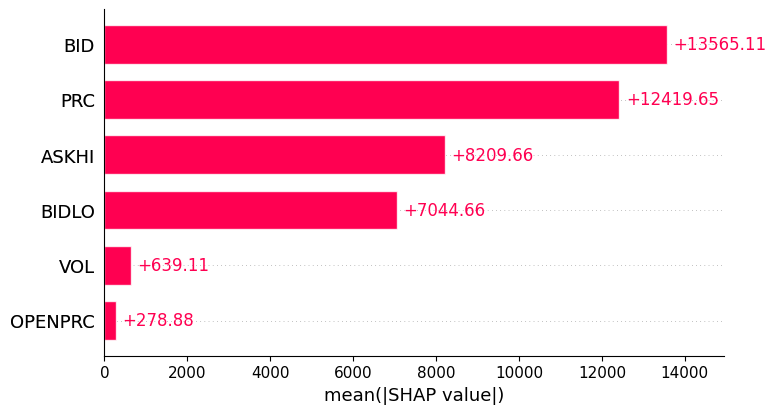

			Shap Values for Standardized Data with Ridge Regressor
			_______________________________________________________


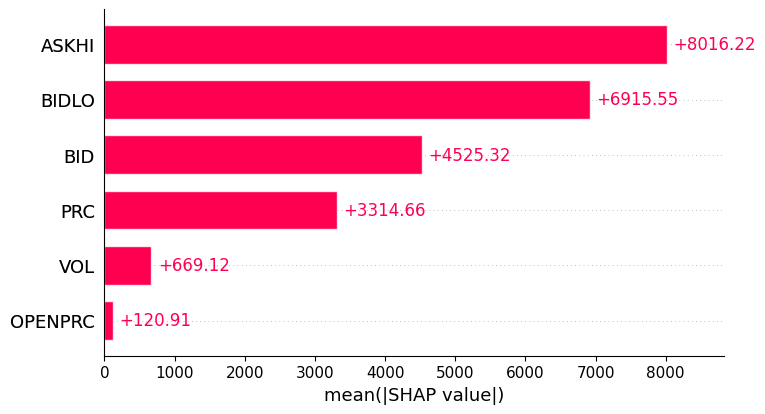

			Shap Values for Standardized Data with XGB Regressor
			____________________________________________________


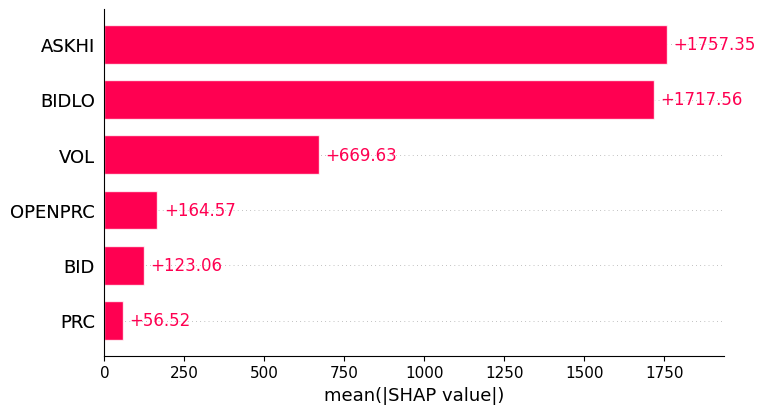

In [9]:
print("\t\t\tShap Values for Standardized Data with Linear Regressor")
print("\t\t\t" + ("_"*55))
explainer = shap.Explainer(sLinReg.predict, x_stest)
shap_values = explainer(x_stest)
shap.plots.bar(shap_values)

print("\t\t\tShap Values for Standardized Data with Ridge Regressor")
print("\t\t\t"+ ("_"*55))
explainer = shap.Explainer(sRidReg.predict, x_stest)
shap_values = explainer(x_stest)
shap.plots.bar(shap_values)

print("\t\t\tShap Values for Standardized Data with XGB Regressor")
print("\t\t\t" + ("_"*52))
explainer = shap.Explainer(sXGBReg.predict, x_stest)
shap_values = explainer(x_stest)
shap.plots.bar(shap_values)

## Pearson Correlation Coefficient

In [10]:
print(both.corr(method='pearson'))

          PRC   VOL  OPENPRC  ASKHI  BIDLO   BID  DATE
PRC      1.00 -0.07     1.00   1.00   1.00  1.00  0.07
VOL     -0.07  1.00    -0.07  -0.07  -0.07 -0.07  0.58
OPENPRC  1.00 -0.07     1.00   1.00   1.00  1.00  0.07
ASKHI    1.00 -0.07     1.00   1.00   1.00  1.00  0.05
BIDLO    1.00 -0.07     1.00   1.00   1.00  1.00  0.08
BID      1.00 -0.07     1.00   1.00   1.00  1.00  0.08
DATE     0.07  0.58     0.07   0.05   0.08  0.08  1.00


## Plotting Expected Results vs Predicted Results For Final k-Fold

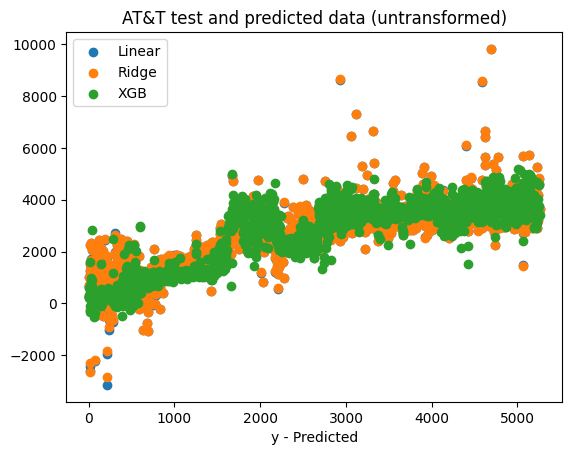

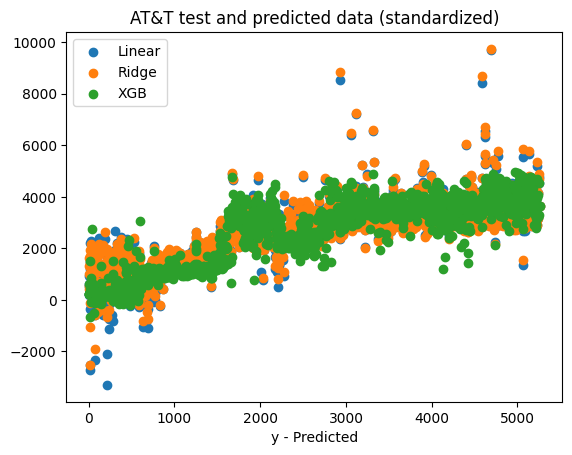

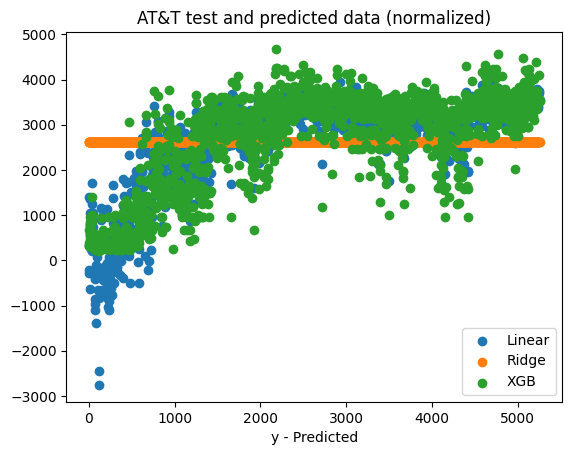

In [11]:
# Plotting the expected Y values vs predicted y values for untransformed data
plt.scatter(y_test, LinPredictions, label="Linear") 
plt.scatter(y_test, RidPredictions, label="Ridge")
plt.scatter(y_test, XGBPredictions, label="XGB")
plt.title("AT&T test and predicted data (untransformed)")
plt.xlabel("y - Expected")
plt.xlabel("y - Predicted")
plt.legend()
plt.show()


# Plotting the expected Y values vs predicted y values for standardized data
plt.scatter(y_test, sLinPredictions, label="Linear") # Will plot the expected Y values vs predicted y values
plt.scatter(y_test, sRidPredictions, label="Ridge")
plt.scatter(y_test, sXGBPredictions, label="XGB")
plt.title("AT&T test and predicted data (standardized)")
plt.xlabel("y - Expected")
plt.xlabel("y - Predicted")
plt.legend()
plt.show()


# Plotting the expected Y values vs predicted y values for normalized data

plt.scatter(y_test, nLinPredictions, label="Linear") # Will plot the expected Y values vs predicted y values
plt.scatter(y_test, nRidPredictions, label="Ridge")
plt.scatter(y_test, nXGBPredictions, label="XGB")
plt.title("AT&T test and predicted data (normalized)")
plt.xlabel("y - Expected")
plt.xlabel("y - Predicted")
plt.legend()
plt.show()

## Plotting Residual Values For Final K-Fold

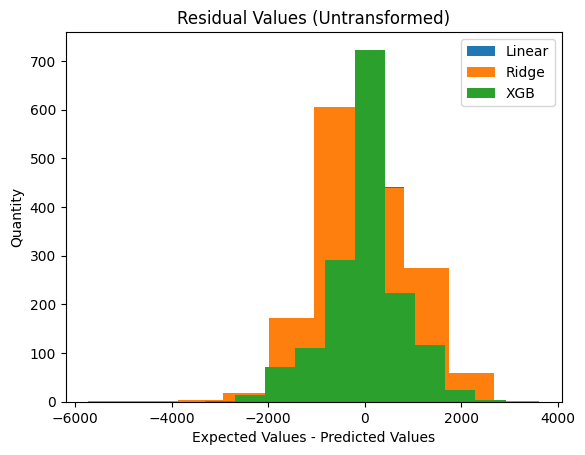

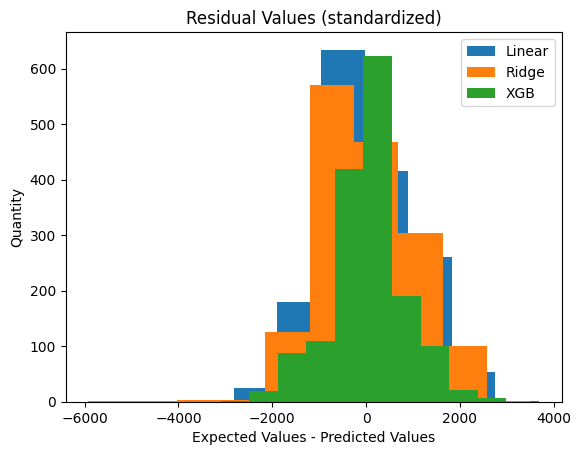

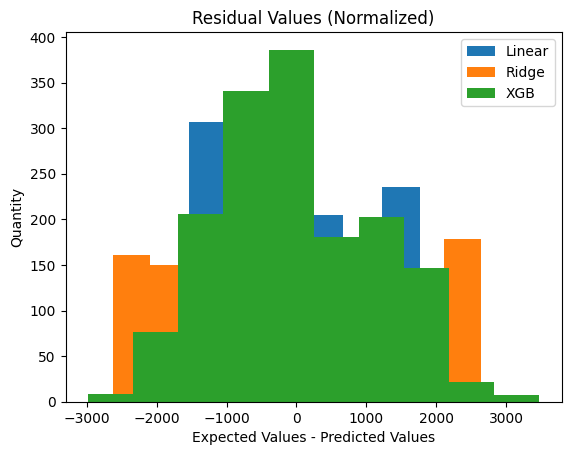

In [12]:
plt.hist(y_test - LinPredictions, label="Linear") 
plt.hist(y_test - RidPredictions, label="Ridge")
plt.hist(y_test - XGBPredictions, label="XGB")
plt.title("Residual Values (Untransformed)")
plt.xlabel("Expected Values - Predicted Values")
plt.ylabel("Quantity")
plt.legend()
plt.show()

plt.hist(y_test - sLinPredictions, label="Linear") 
plt.hist(y_test - sRidPredictions, label="Ridge")
plt.hist(y_test - sXGBPredictions, label="XGB")
plt.title("Residual Values (standardized)")
plt.xlabel("Expected Values - Predicted Values")
plt.ylabel("Quantity")
plt.legend()
plt.show()

plt.hist(y_test - nLinPredictions, label="Linear") 
plt.hist(y_test - nRidPredictions, label="Ridge")
plt.hist(y_test - nXGBPredictions, label="XGB")
plt.title("Residual Values (Normalized)")
plt.xlabel("Expected Values - Predicted Values")
plt.ylabel("Quantity")
plt.legend()
plt.show()

## Principle Component Analysis

In [13]:
meanpLin = 0
meanpRid = 0
meanpXGB = 0
meanapLin = 0
meanapRid = 0
meanapXGB = 0

for i in range(repeats):
    pca = PCA(n_components=3)
    pca.fit(x)
    new_df = pd.DataFrame(pca.transform(x), columns=['PCA%i' % i for i in range(3)], index=x.index)


    px_train, px_test, py_train, py_test = train_test_split(new_df, y, test_size = 0.3)
    px_strain = StandardScaler().fit_transform(px_train)
    px_stest = StandardScaler().fit_transform(px_test)
    rows = len(y_test)

    # Regression on standardized data
    pLinReg = LinearRegression() #Fitting linear regression to our training set
    pLinReg.fit(px_strain, py_train)
    pRidReg = Ridge() #Fitting ridge regression to our training set
    pRidReg.fit(px_strain, py_train)
    pXGBReg = xgb.XGBRegressor(verbosity=0, max_depth=3) #Fitting XGB regression to our training set
    pXGBReg.fit(px_strain, py_train)



    # Predicting standardized data with regression models
    pLinPredictions = pLinReg.predict(px_stest) # Predictions will equal the predicted y values for the x_test values
    pRidPredictions = pRidReg.predict(px_stest)
    pXGBPredictions = pXGBReg.predict(px_stest)


    pLin = metrics.r2_score(py_test, pLinPredictions)
    pRid = metrics.r2_score(py_test, pRidPredictions)
    pXGB = metrics.r2_score(py_test, pXGBPredictions)
    
    meanpLin = meanpLin + pLin
    meanpRid = meanpRid + pRid
    meanpXGB = meanpXGB + pXGB
    
    meanapLin = meanapLin + (1 - ((1-pLin)*(rows-1)/(rows-2-1)))
    meanapRid = meanapRid + (1 - ((1-pRid)*(rows-1)/(rows-2-1)))
    meanapXGB = meanapXGB + (1 - ((1-pXGB)*(rows-1)/(rows-2-1)))


meanpLin = meanpLin / repeats
meanpRid = meanpRid / repeats
meanpXGB = meanpXGB / repeats
meanapLin = meanapLin / repeats
meanapRid = meanapRid / repeats
meanapXGB = meanapXGB / repeats
    

## K-Fold Regression Statistics

In [14]:
print("K-Fold Cross Validation")
print("Untransformed Data\nLinear Regression:")
print("\tR^2 score: " + str(meanunLin)) # Calculate the r2 score
print("\tAdjusted R^2 score: " + str(meanaunLin)) # Calculate the adjusted r2 score
print("\n")
print("Ridge Regression:")
print("\tR^2 score: " + str(meanunRid)) # Calculate the r2 score
print("\tAdjusted R^2 score: " + str(meanaunRid)) # Calculate the adjusted r2 score
print("\n")
print("XGB Regression:")
print("\tR^2 score: " + str(meanunXGB)) # Calculate the r2 score
print("\tAdjusted R^2 score: " + str(meanaunXGB)) # Calculate the adjusted r2 score
print("\n\n")
print('-'*50)

print("Normalized Data\nLinear Regression:")
print("\tR^2 score: " + str(meannLin)) # Calculate the r2 score
print("\tAdjusted R^2 score: " + str(meananLin)) # Calculate the adjusted r2 score
print("\n")
print("Ridge Regression:")
print("\tR^2 score: " + str(meannRid)) # Calculate the r2 score
print("\tAdjusted R^2 score: " + str(meananRid)) # Calculate the adjusted r2 score
print("\n")
print("XGB Regression:")
print("\tR^2 score: " + str(meannXGB)) # Calculate the r2 score
print("\tAdjusted R^2 score: " + str(meananXGB)) # Calculate the adjusted r2 score
print("\n\n")
print('-'*50)

print("Standardized Data\nLinear Regression:")
print("\tR^2 score: " + str(meansLin)) # Calculate the r2 score
print("\tAdjusted R^2 score: " + str(meanasLin)) # Calculate the adjusted r2 score
print("\n")
print("Ridge Regression:")
print("\tR^2 score: " + str(meansRid)) # Calculate the r2 score
print("\tAdjusted R^2 score: " + str(meanasRid)) # Calculate the adjusted r2 score
print("\n")
print("XGB Regression:")
print("\tR^2 score: " + str(meansXGB)) # Calculate the r2 score
print("\tAdjusted R^2 score: " + str(meanasXGB)) # Calculate the adjusted r2 score
print("\n\n")
print('-'*50)

print("PCA Standardized Data\nLinear Regression:")
print("\tR^2 score: " + str(meanpLin)) # Calculate the r2 score
print("\tAdjusted R^2 score: " + str(meanapLin)) # Calculate the adjusted r2 score
print("\n")
print("Ridge Regression:")
print("\tR^2 score: " + str(meanpRid)) # Calculate the r2 score
print("\tAdjusted R^2 score: " + str(meanapRid)) # Calculate the adjusted r2 score
print("\n")
print("XGB Regression:")
print("\tR^2 score: " + str(meanpXGB)) # Calculate the r2 score
print("\tAdjusted R^2 score: " + str(meanapXGB)) # Calculate the adjusted r2 score
print("\n\n")
print('-'*50)

K-Fold Cross Validation
Untransformed Data
Linear Regression:
	R^2 score: 0.5838353863687283
	Adjusted R^2 score: 0.5822469718128837


Ridge Regression:
	R^2 score: 0.583996071069828
	Adjusted R^2 score: 0.5824082698143693


XGB Regression:
	R^2 score: 0.7437540184388601
	Adjusted R^2 score: 0.7427759803412985



--------------------------------------------------
Normalized Data
Linear Regression:
	R^2 score: 0.4758172111329106
	Adjusted R^2 score: 0.473816513465479


Ridge Regression:
	R^2 score: -0.000856053824954639
	Adjusted R^2 score: -0.004676115099095668


XGB Regression:
	R^2 score: 0.48626879923545213
	Adjusted R^2 score: 0.48430799312566375



--------------------------------------------------
Standardized Data
Linear Regression:
	R^2 score: 0.5843974982351985
	Adjusted R^2 score: 0.5828112291444931


Ridge Regression:
	R^2 score: 0.5732471289444285
	Adjusted R^2 score: 0.571618301192308


XGB Regression:
	R^2 score: 0.7366850712855617
	Adjusted R^2 score: 0.7356800524736746


# PCA vs Non-PCA

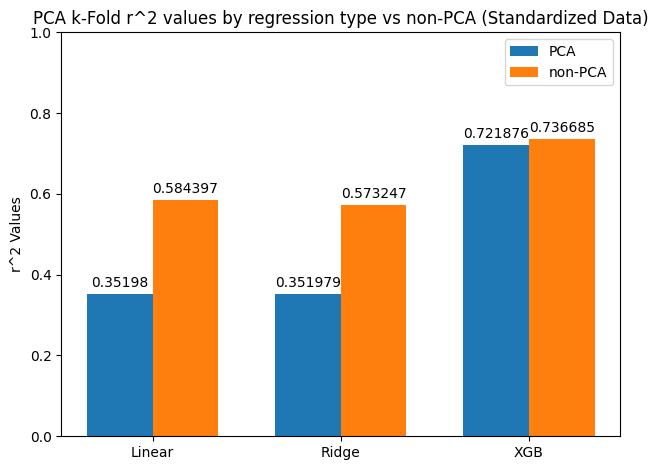

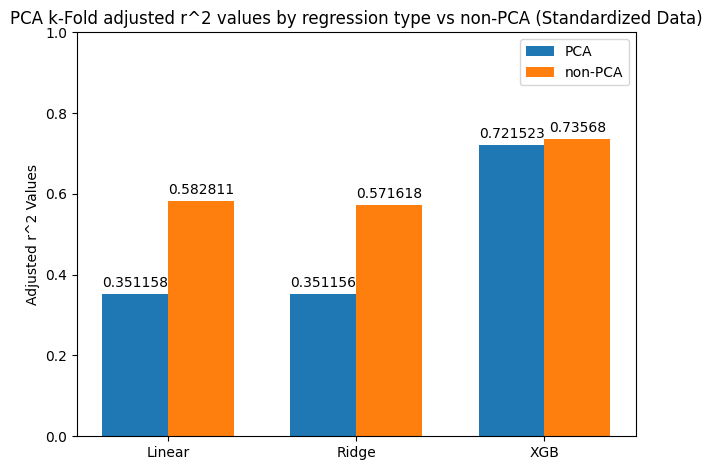

In [15]:
labels = ['Linear', 'Ridge', 'XGB']
nonPCA = [meansLin, meansRid, meansXGB]
nPCA = [meanpLin, meanpRid, meanpXGB]
x_axis = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x_axis - width/2, nPCA, width, label='PCA')
rects2 = ax.bar(x_axis + width/2, nonPCA, width, label='non-PCA')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("r^2 Values")
ax.set_title('PCA k-Fold r^2 values by regression type vs non-PCA (Standardized Data)')
ax.set_xticks(x_axis, labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.ylim(top = 1)
plt.show()

labels = ['Linear', 'Ridge', 'XGB']
nonPCA = [meanasLin, meanasRid, meanasXGB]
nPCA = [meanapLin, meanapRid, meanapXGB]
x_axis = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x_axis - width/2, nPCA, width, label='PCA')
rects2 = ax.bar(x_axis + width/2, nonPCA, width, label='non-PCA')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Adjusted r^2 Values")
ax.set_title('PCA k-Fold adjusted r^2 values by regression type vs non-PCA (Standardized Data)')
ax.set_xticks(x_axis, labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.ylim(top = 1)
plt.show()